<a href="https://www.kaggle.com/code/mohainurrohman/sentiment-analysis-with-svm-nb-rf-algorithms?scriptVersionId=115386413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents

* [Abstract](#abstract)
* [1. Introduction](#1)
* [2. Literature Review](#2)
* [3. Design System](#3)
* [4. Experiment](#4)
    - [4.1 Install Library](#4.1)
    - [4.2 Load Library](#4.2)
    - [4.3 Load Data](#4.3)
    - [4.4 Exploratory Data Analysis](#4.4)
        - [4.4.1 Sentiment Distribution](#4.4.1)
    - [4.5 Data Preparation](#4.5)
        - [4.5.1 Data Cleaning](#4.5.1)
        - [4.5.2 TF-IDF](#4.5.2)
        - [4.5.3 Splitting Data](#4.5.3)
        - [4.5.4 Handling Data Imbalance (Over Sampling)](#4.5.4)
    - [4.6 Modelling](#4.6)
        - [4.6.1 Naive Bayes](#4.6.1)
        - [4.6.2 SVM](#4.6.2)
        - [4.6.3 Random Forest](#4.6.3)
* [5. Result](#5)
* [6. Conclusion](#6)

<a id="abstract"></a>
## Abstrak

The PLN Mobile application is part of the transformation that PLN is carrying out to improve service to customers. Since it was launched with a new appearance and various features at the end of 2020, PLN has continuously updated features and various services to customers. To find out how good the PLN Mobile application is, a special technique is needed, namely Sentiment Analysis. This experiment performs sentiment analysis on the PLN Mobile application using the Naive Bayes, SVM, and Random Forest algorithms. With 90% of training data and 10% of test data. The results show that Random Forest produces the best accuracy, precision and f1-score with values of 93%, 81% and 84%. Meanwhile, Naive Bayes showed the best recall of 90%.

<a id="1"></a>
### 1. Introduction
The PLN Mobile application is part of the transformation that PLN is carrying out to improve service to customers. Since it was launched with a new appearance and various features at the end of 2020, PLN has continuously updated features and various services to customers.

To find out how good the PLN Mobile application is, a special technique is needed, namely Sentiment Analysis. In this experiment, sentiment analysis was carried out using three algorithms, namely Naive Bayes, Support Vector Machine (SVM) and Decision tree. Naive Bayes algorithm was chosen because it works very fast and simple, SVM was chosen because it is effective in high-dimensional space, Random Forest was chosen because it balances the bias-variance trade-off well. For testing using the confusion matrix. after that compare the three algorithms to find the best results.

### Research Problem
How to do sentiment analysis using Naive Bayes, SVM, and Random Forest algorithms?

### Research Question
How accurate are Naive Bayes, SVM, and Random Forest in sentiment analysis?

### Research Objective
The purpose of this experiment is to compare the accuracy of the Naive Bayes, SVM, and Random Forest algorithms.

<a id="2"></a>
### 2. Literature Review

**Naive Bayes**

The Naive Bayes classifier separates data into different classes according to the Bayes’ Theorem, along with the assumption that all the predictors are independent of one another. It assumes that a particular feature in a class is not related to the presence of other features. 

**Pros**

* This algorithm works very fast and can easily predict the class of a test dataset. 
* You can use it to solve multi-class prediction problems as it’s quite useful with them. 
* Naive Bayes classifier performs better than other models with less training data if the assumption of independence of features holds. 
* If you have categorical input variables, the Naive Bayes algorithm performs exceptionally well in comparison to numerical variables. 
* It can be used for Binary and Multi-class Classifications.
* It effectively works in Multi-class predictions.

**Cons**

* If your test data set has a categorical variable of a category that wasn’t present in the training data set, the Naive Bayes model will assign it zero probability and won’t be able to make any predictions in this regard. This phenomenon is called ‘Zero Frequency,’ and you’ll have to use a smoothing technique to solve this problem.
* This algorithm is also notorious as a lousy estimator. So, you shouldn’t take the probability outputs of ‘predict_proba’ too seriously. 
* It assumes that all the features are independent. While it might sound great in theory, in real life, you’ll hardly find a set of independent features. 

([source:upgrade.com](https://www.upgrad.com/blog/naive-bayes-classifier/))

**SVM**

“Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (look at the below snapshot). 

**Pros**

* It works really well with a clear margin of separation
* It is effective in high dimensional spaces.
* It is effective in cases where the number of dimensions is greater than the number of samples.
* It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

**Cons**

* It doesn’t perform well when we have large data set because the required training time is higher
* It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
* SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

([source:analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/))

**Random Forest**

Random forest is a supervised learning algorithm. It builds a forest with an ensemble of decision trees. It is an easy to use machine learning algorithm that produces a great result most of the time even without hyperparameter tuning.

**Pros**

* Random Forests can be used for both classification and regression tasks.
* Random Forests work well with both categorical and numerical data. No scaling or transformation of variables is usually necessary.
* Random Forests implicitly perform feature selection and generate uncorrelated decision trees. It does this by choosing a random set of features to build each decision tree. This also makes it a great model when you have to work with a high number of features in the data.
* Random Forests are not influenced by outliers to a fair degree. It does this by binning the variables.
* Random Forests can handle linear and non-linear relationships well.
* Random Forests generally provide high accuracy and balance the bias-variance trade-off well. Since the model’s principle is to average the results across the multiple decision trees it builds, it averages the variance as well.

**Cons**

* Random Forests are not easily interpretable. They provide feature importance but it does not provide complete visibility into the coefficients as linear regression.
* Random Forests can be computationally intensive for large datasets.
* Random forest is like a black box algorithm, you have very little control over what the model does.

([source:medium.datadriveninvestor.com](https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04))

<a id="3"></a>
### 3. Design System

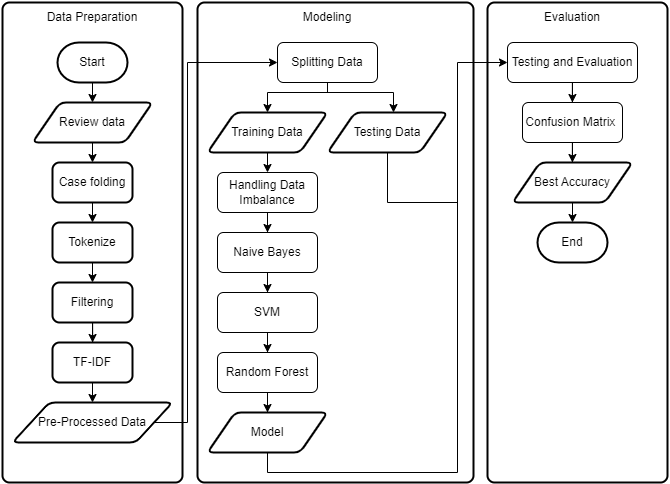

<a id="4"></a>
### 4. Experiment

<a id="4.1"></a>
### 4.1 Install Library

In [1]:
!pip install sastrawi
!pip install contractions

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 830.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 3.2 MB/s eta 0:00:00


<a id="4.2"></a>
### 4.2 Load Library

In [2]:
import re
import tqdm
import nltk
import string
import numpy as np
import unicodedata
import pandas as pd
import contractions
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

<a id="4.3"></a>
### 4.3 Load Data

In [3]:
df = pd.read_csv('/kaggle/input/pln-mobile-reviews/PLN Mobile Reviews.csv')
df.rename(columns = {'rating':'sentiment'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218172 entries, 0 to 218171
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user       218172 non-null  object
 1   review     218172 non-null  object
 2   sentiment  218172 non-null  int64 
 3   date       218172 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.7+ MB


In [4]:
df = df.sort_values(by='date', ascending=False)
df = df[['review', 'sentiment']]
df.head()

,review,sentiment
0,Pengaduan lebih cepat tanggap,5
1,pln mobile memang mantab,5
2,Alhamdulilah sangat membantu aplikasi ini🙏🙏🙏,5
3,"Saat pengaduan susah untuk uplode poto, eror trus",1
4,Susah untuk buka aplikasi apa sih jelek banget,5


<a id="4.4"></a>
### 4.4 Exploratory Data Analysis

In [5]:
df = df.replace({'sentiment' : {1:'negative', 2:'negative', 3:'neutral', 4:'positive', 5: 'positive' }})
df.head()

,review,sentiment
0,Pengaduan lebih cepat tanggap,positive
1,pln mobile memang mantab,positive
2,Alhamdulilah sangat membantu aplikasi ini🙏🙏🙏,positive
3,"Saat pengaduan susah untuk uplode poto, eror trus",negative
4,Susah untuk buka aplikasi apa sih jelek banget,positive


<a id="4.4.1"></a>
### 4.4.1 Sentiment Distribution

In [6]:
x = df.sentiment.value_counts()
x

positive    191711
negative     20913
neutral       5548
Name: sentiment, dtype: int64

Text(0, 0.5, 'sample')

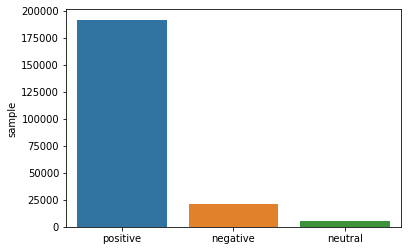

In [7]:
sns.barplot(x.index, x)
plt.gca().set_ylabel('sample')

In [8]:
#removing neutral
df = df[df.sentiment != "neutral"]

<a id="4.5"></a>
### 4.5 Data Preparation

<a id="4.5.1"></a>
### 4.5.1 Data Cleaning

In [9]:
def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('indonesian')
    #list_stopwords = stopwords.words('indonesian')
    #list_stopwords.extend([])
    #txt_stopword = pd.read_csv("#", names= ["stopwords"], header = None)
    #list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
    return [word for word in words if word not in list_stopwords]

def stemmed_wrapper(term):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(term)

In [10]:
def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    doc = word_tokenize(doc)
    doc = stopwords_removal(doc)
    #doc = stemmed_wrapper(doc)
    norm_docs.append(doc)

  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

In [11]:
%%time
df.review = pre_process_corpus(df.review)

100%|██████████| 212624/212624 [02:54<00:00, 1216.44it/s]


CPU times: user 2min 46s, sys: 8.18 s, total: 2min 55s
Wall time: 2min 54s


<a id="4.5.2"></a>
### 4.5.2 TF-IDF

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(df['review'].astype('U'))

<a id="4.5.3"></a>
### 4.5.3 Splitting Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['sentiment'], test_size=0.1, random_state = 42)

<a id="4.5.4"></a>
### 4.5.4 Handle Data Imbalance (Oversampling)

In [14]:
#OVERSAMPLING

print("Before OverSampling, counts of label 'Positive': {}".format(sum(y_train == 'positive')))
print("Before OverSampling, counts of label 'Negative': {}".format(sum(y_train == 'negative')))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'positive': {}".format(sum(y_train_res == 'positive')))
print("After OverSampling, counts of label 'negative': {}".format(sum(y_train_res == 'negative')))

Before OverSampling, counts of label 'Positive': 172506
Before OverSampling, counts of label 'Negative': 18855
After OverSampling, the shape of train_X: (345012, 53319)
After OverSampling, the shape of train_y: (345012,) 

After OverSampling, counts of label 'positive': 172506
After OverSampling, counts of label 'negative': 172506


<a id="4.6"></a>
### 4.6 Modelling

<a id="4.6.1"></a>
### 4.6.1 Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

clf_nb = MultinomialNB().fit(X_train_res, y_train_res)
y_pred_nb = clf_nb.predict(X_test)
print("MultinomialNB Accuracy:" , accuracy_score(y_test,y_pred_nb))
print("MultinomialNB Precision:" , precision_score(y_test,y_pred_nb, average="macro", pos_label="negative" ))
print("MultinomialNB Recall:" , recall_score(y_test,y_pred_nb, average="macro", pos_label="negative"))
print("MultinomialNB f1_score:" , f1_score(y_test,y_pred_nb, average="macro", pos_label="negative"))

print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred_nb)}')
print('================================================\n') 
print(classification_report(y_test, y_pred_nb, zero_division=0))       

MultinomialNB Accuracy: 0.8858580633024503
MultinomialNB Precision: 0.723526075209068
MultinomialNB Recall: 0.9040584947483661
MultinomialNB f1_score: 0.7721164346853765
confusion matrix:
 [[ 1907   151]
 [ 2276 16929]]

              precision    recall  f1-score   support

    negative       0.46      0.93      0.61      2058
    positive       0.99      0.88      0.93     19205

    accuracy                           0.89     21263
   macro avg       0.72      0.90      0.77     21263
weighted avg       0.94      0.89      0.90     21263



<a id="4.6.2"></a>
### 4.6.2 SVM

In [16]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear').fit(X_train_res, y_train_res)
y_pred_svm = clf_svm.predict(X_test)
print("Support Vector Machine Accuracy:" , accuracy_score(y_test,y_pred_svm))
print("Support Vector Machine Precision:" , precision_score(y_test,y_pred_svm, average="macro", pos_label="negative" ))
print("Support Vector Machine Recall:" , recall_score(y_test,y_pred_svm, average="macro", pos_label="negative"))
print("Support Vector Machine f1_score:" , f1_score(y_test,y_pred_svm, average="macro", pos_label="negative"))

print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred_svm)}')
print('================================================\n') 
print(classification_report(y_test, y_pred_svm, zero_division=0))  

Support Vector Machine Accuracy: 0.8852937026760099
Support Vector Machine Precision: 0.7212440537327779
Support Vector Machine Recall: 0.894852379155999
Support Vector Machine f1_score: 0.7688378931172624
confusion matrix:
 [[ 1866   192]
 [ 2247 16958]]

              precision    recall  f1-score   support

    negative       0.45      0.91      0.60      2058
    positive       0.99      0.88      0.93     19205

    accuracy                           0.89     21263
   macro avg       0.72      0.89      0.77     21263
weighted avg       0.94      0.89      0.90     21263



<a id="4.6.3"></a>
### 4.6.3 Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier().fit(X_train_res, y_train_res)
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Accuracy:" , accuracy_score(y_test,y_pred_rf))
print("Random Forest Precision:" , precision_score(y_test,y_pred_rf, average="macro", pos_label="negative" ))
print("Random Forest Recall:" , recall_score(y_test,y_pred_rf, average="macro", pos_label="negative"))
print("Random Forest f1_score:" , f1_score(y_test,y_pred_rf, average="macro", pos_label="negative"))

print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred_rf)}')
print('================================================\n') 
print(classification_report(y_test, y_pred_rf, zero_division=0))

Random Forest Accuracy: 0.939566382918685
Random Forest Precision: 0.8128203344653546
Random Forest Recall: 0.8975647892957905
Random Forest f1_score: 0.8481477347184408
confusion matrix:
 [[ 1740   318]
 [  967 18238]]

              precision    recall  f1-score   support

    negative       0.64      0.85      0.73      2058
    positive       0.98      0.95      0.97     19205

    accuracy                           0.94     21263
   macro avg       0.81      0.90      0.85     21263
weighted avg       0.95      0.94      0.94     21263



<a id="5"></a>
### 5. Result

In the experiment using more than 200,000 PLN Mobile reviews. The data is divided into two: 90% of the training data and 10% of the testing data. Experiments show the results of accuracy, precision, recall, and f1-score as follows:

| Algorithms | Accuracy | Precision | Recall | F1-Score |
| --- | --- | --- | --- | --- |
| Naive Bayes | 88% | 72% | 90% | 77% |
| SVM | 88% | 72% | 89% | 76% |
| Random Forest | 93% | 81% | 89% | 84% |

<a id="6"></a>
### 6. Conclusion

In this experiment, based on the results of the comparison of the three algorithms, it shows that the best results for accuracy, precision, and f1-score are obtained from the Random Forest algorithm, while the best recall is obtained from the Naive Bayes algorithm. For further experiments, it is better to use other machine learning algorithms as a comparison.